In [ ]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.8.2
Keras version: 2.8.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bodyfat.csv to bodyfat.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['bodyfat.csv']))
print(df2.isnull().sum())


df2.head()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
df2_features= df2.copy()
df2_labels = df2_features.pop('BodyFat')

In [ ]:
df2_features = np.array(df2_features)
print(df2_features)

[[  1.0708  23.     154.25   ...  32.      27.4     17.1   ]
 [  1.0853  22.     173.25   ...  30.5     28.9     18.2   ]
 [  1.0414  22.     154.     ...  28.8     25.2     16.6   ]
 ...
 [  1.0328  72.     186.75   ...  31.3     27.2     18.    ]
 [  1.0399  72.     190.75   ...  30.5     29.4     19.8   ]
 [  1.0271  74.     207.5    ...  33.7     30.      20.9   ]]


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [ ]:
normalizer.adapt(np.array(df2_features))

In [ ]:
first = np.array(df2_features)
df2_normalized = normalizer(np.array(df2_features)).numpy()
with np.printoptions(precision=2, suppress=True):
  
  print('Normalized:', normalizer(first).numpy())

Normalized: [[ 0.8  -1.74 -0.84 ... -0.09 -0.63 -1.21]
 [ 1.57 -1.82 -0.19 ... -0.59  0.12 -0.03]
 [-0.75 -1.82 -0.85 ... -1.15 -1.72 -1.75]
 ...
 [-1.2   2.16  0.27 ... -0.32 -0.73 -0.25]
 [-0.83  2.16  0.4  ... -0.59  0.37  1.69]
 [-1.5   2.31  0.97 ...  0.47  0.66  2.87]]


In [ ]:
from sklearn.model_selection import train_test_split

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15



# features = ['Density','Age'	,'Weight',	'Height'	,'Neck'	,'Chest'	,'Abdomen	Hip'	,'Thigh'	,'Knee'	,'Ankle	Biceps'	,'Forearm'	,'Wrist']
# label = 'BodyFat'

x_train, x_test, y_train, y_test = train_test_split(df2_normalized,
                                                    df2_labels.values,
                                                    test_size=0.15,
                                                    random_state=0)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),random_state=0)



In [ ]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Flatten(input_shape=[14], name="inputLayer"))
model1.add(tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer1",kernel_regularizer=tf.keras.regularizers.L2(0.01)))
model1.add(tf.keras.layers.Dense(64, activation="relu", name="HiddenLayer2",kernel_regularizer=tf.keras.regularizers.L2(0.01)))
# model1.add(tf.keras.layers.Dense(32, activation="relu", name="HiddenLayer3",kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model1.add(tf.keras.layers.Dense(1, activation="relu", name="outputLayer"))
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 14)                0         
                                                                 
 HiddenLayer1 (Dense)        (None, 128)               1920      
                                                                 
 HiddenLayer2 (Dense)        (None, 64)                8256      
                                                                 
 outputLayer (Dense)         (None, 1)                 65        
                                                                 
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error',metrics='RootMeanSquaredError')


batch_size = 32
epochs = 120

In [ ]:
history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,validation_data=(x_val, y_val))

Epoch 1/120
7/7 [==============================] - 1s 25ms/step - loss: 332.9549 - root_mean_squared_error: 18.1678 - val_loss: 289.4430 - val_root_mean_squared_error: 16.8433
Epoch 2/120
7/7 [==============================] - 0s 6ms/step - loss: 313.6740 - root_mean_squared_error: 17.5039 - val_loss: 186.5102 - val_root_mean_squared_error: 13.3201
Epoch 3/120
7/7 [==============================] - 0s 6ms/step - loss: 141.7135 - root_mean_squared_error: 11.4805 - val_loss: 141.7977 - val_root_mean_squared_error: 11.4429
Epoch 4/120
7/7 [==============================] - 0s 6ms/step - loss: 97.4528 - root_mean_squared_error: 9.2689 - val_loss: 60.9039 - val_root_mean_squared_error: 6.9664
Epoch 5/120
7/7 [==============================] - 0s 6ms/step - loss: 91.8554 - root_mean_squared_error: 8.8927 - val_loss: 64.6778 - val_root_mean_squared_error: 7.1686
Epoch 6/120
7/7 [==============================] - 0s 6ms/step - loss: 46.3900 - root_mean_squared_error: 5.7265 - val_loss: 46.7699

In [ ]:
model1.evaluate(x_test,y_test)

1/1 [==============================] - 0s 23ms/step - loss: 3.0268 - root_mean_squared_error: 1.4910


[3.0268335342407227, 1.4909956455230713]

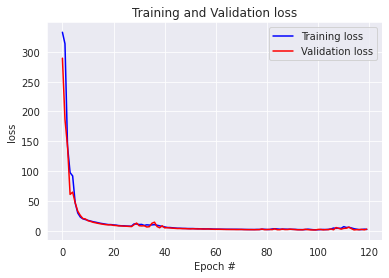

In [ ]:
sns.set_style("darkgrid")
#get the details form the history object
# acc = history.history['Root']
# val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(120)

#Train and validation accuracy
# plt.plot(epochs, acc, 'b', label='Training accurarcy')
# plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
# plt.xlabel('Epoch #')
# plt.ylabel('accuracy')
# plt.title('Training and Validation accurarcy')
# plt.legend()
# #plt.savefig('ensemble_seresnext50_eff-b3_graph_test_acc.png')

# plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
#plt.savefig('ensemble_seresnext50_eff-b3_graph_test_loss.png')

plt.show()

In [ ]:
# 2 Hidden Layers are optimal.
# RELU is optimal for hidden layers since using sigmoid we are getting higher loss so its not preferable.
# When we are using very small learning rate its taking very long time to get  the Global Optimum.
# Regularization is helping for our model.We tested out both L1 and L2 with regularization parameter of 0.01 and found out that L2 is performing better.